<a href="https://colab.research.google.com/github/OctavaOrigin/Classic-Machine-Learning/blob/main/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D1%8B_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from skimage.metrics import structural_similarity as ssim

In [ ]:
import matplotlib.pyplot as plt
import cv2
import skimage
import requests
def draw_picture(image = np.array([]), title='image', bgr=False, new_rgb = None):
  if (image.any()):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
  if (new_rgb):
    new_image = cv2.merge([new_rgb[0], new_rgb[1], new_rgb[2]])
  else:
    new_image = cv2.merge([r, g, b])
  plt.figure(figsize=(7, 5))
  plt.axis('off')
  plt.imshow(new_image)
  plt.title(title)
  plt.show()

In [ ]:
url = 'https://pekoeblaze.files.wordpress.com/2014/05/300-x-200-px-immaterialization-_by_marendo_mc3bcller.jpg'

In [ ]:
response = requests.get(url, stream=True)
with open('temp_image.jpg', 'wb') as file:
    file.write(response.content)
img = cv2.imread('temp_image.jpg')

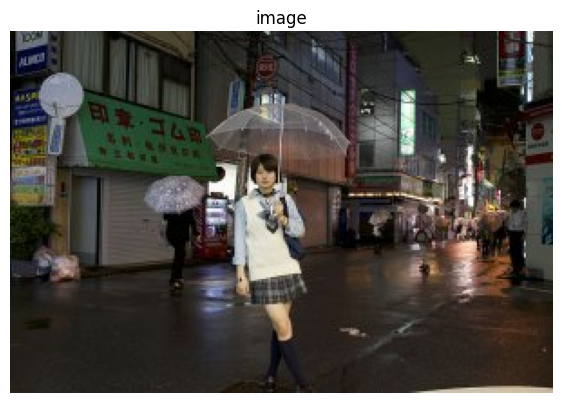

In [ ]:
draw_picture(image = img)

In [ ]:
colors_bgr = cv2.split(img)
colors = np.column_stack((colors_bgr[0].ravel(), colors_bgr[1].ravel(), colors_bgr[2].ravel()))

In [ ]:
def draw_new_img(labels, centers, image_name):
  new_colors = centers[labels]
  r = new_colors[:, 2].reshape(colors_bgr[0].shape).astype('int64')
  g = new_colors[:, 1].reshape(colors_bgr[0].shape).astype('int64')
  b = new_colors[:, 0].reshape(colors_bgr[0].shape).astype('int64')
  draw_picture(title = image_name, new_rgb = (r, g, b))
  print(f'Схожесть: {ssim(img, cv2.merge([b, g, r]), win_size=3)}')

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


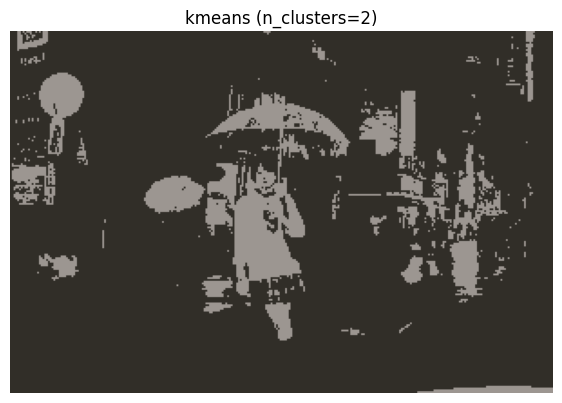

Схожесть: 0.531307372536413


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(colors)
draw_new_img(kmeans.labels_, kmeans.cluster_centers_, image_name = 'kmeans (n_clusters=2)')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


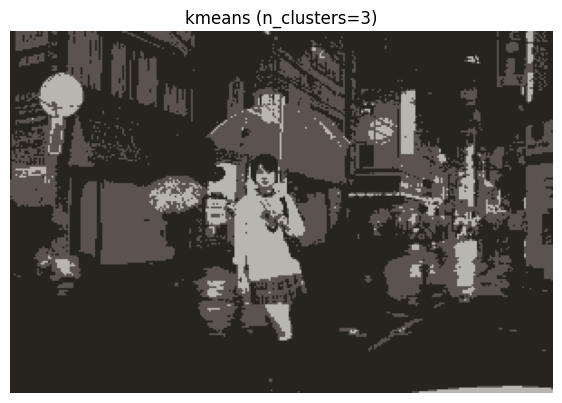

Схожесть: 0.6274925550973891


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(colors)
draw_new_img(kmeans.labels_, kmeans.cluster_centers_, image_name = 'kmeans (n_clusters=3)')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


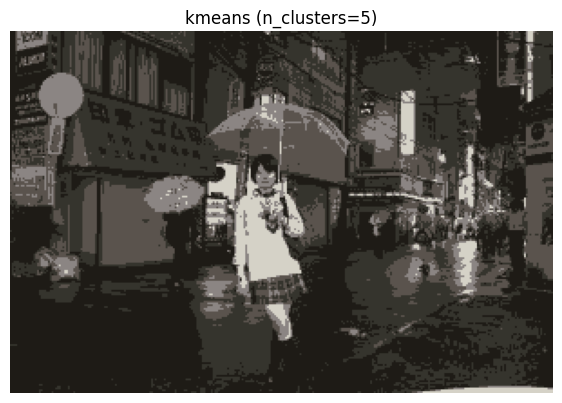

Схожесть: 0.7001509602642986


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(colors)
draw_new_img(kmeans.labels_, kmeans.cluster_centers_, image_name = 'kmeans (n_clusters=5)')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


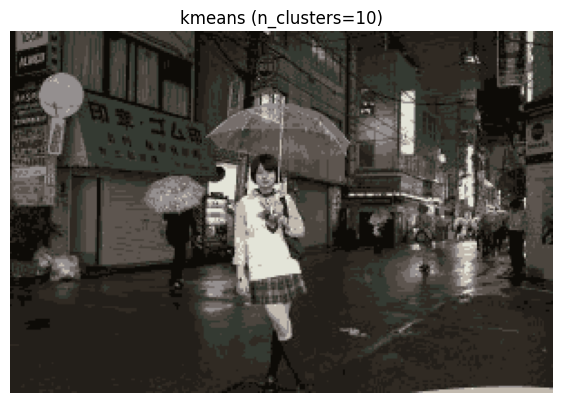

Схожесть: 0.8038371636526505


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


In [ ]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(colors)
draw_new_img(kmeans.labels_, kmeans.cluster_centers_, image_name = 'kmeans (n_clusters=10)')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


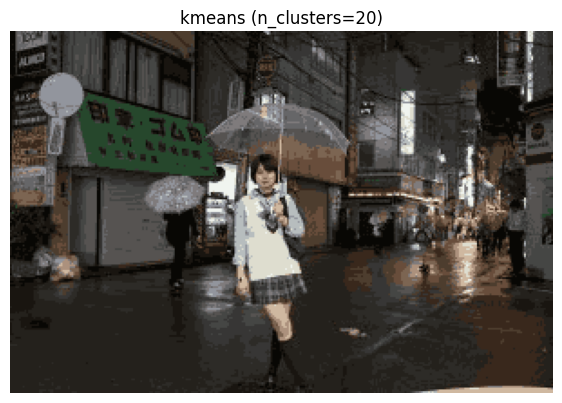

Схожесть: 0.877792666008903


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


In [ ]:
kmeans = KMeans(n_clusters=20)
kmeans.fit(colors)
draw_new_img(kmeans.labels_, kmeans.cluster_centers_, image_name = 'kmeans (n_clusters=20)')